# Retina Image Classification Using DCGAN and CNN

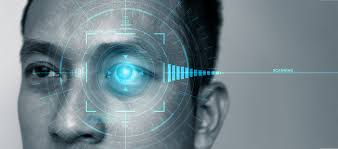

## Project Introduction: Retina Image Classification Using DCGAN and CNN

<p style="font-size: 17px">In this project, we aim to develop a robust system for classifying real and synthetic retina images using advanced machine learning techniques. The primary objective is to generate synthetic retina images from a single eye photo using Deep Convolutional Generative Adversarial Networks (DCGAN) and then classify these images using a Convolutional Neural Network (CNN).</p>

### Project Overview


**1. Image Extraction**: We start by capturing a single eye photo from a person's face. Using computer vision techniques, we extract the retina region from the eye photo. This step is crucial for creating a dataset that closely resembles real retinal images.

**2. Data Collection**: We compile a dataset of 1000 real retina images. These images serve as the ground truth for our project and will be used to train our models.

**3. Synthetic Image Generation**: Leveraging the power of DCGAN, we generate 1000 synthetic retina images. DCGAN consists of two main components: a generator that creates new images and a discriminator that tries to distinguish between real and fake images. Through iterative training, the generator improves its ability to produce realistic retina images.

**4. Data Labeling**: The real retina images are labeled as '1', while the synthetic images are labeled as '0'. This labeled dataset is essential for training our classification model.

**5. Model Training**: We build and train a CNN model using the labeled dataset. The CNN will learn to differentiate between real and synthetic retina images based on the features it extracts during training.

**6. Evaluation and Optimization**: We evaluate the performance of our CNN model on a validation set. To enhance the accuracy of our model, we perform hyperparameter tuning and other optimization techniques.



## Significance of the Project

<p style="font-size: 17px">The ability to accurately classify real and synthetic retina images has significant implications in various fields, including medical diagnostics and security. By improving the accuracy of such classifications, we can enhance the reliability of automated systems that rely on retinal imaging.</p>

In [ ]:
import cv2
import pandas as pd
import os
import random

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

ouput_dir = "/kaggle/working/retina_images"
os.makedirs(output_dir, exist_ok=True)
data = []

image_path = "/kaggle/input/retina/Fotograf - 6.07.2024 11.09.jpg" 
frame = cv2.imread(image_path)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

count = 0
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

    if len(eyes) < 2:
        continue

    eye_regions = []
    for (ex, ey, ew, eh) in eyes:
        eye_regions.append((ex, ey, ew, eh))
    
    for i in range(1000):
        if count >= 1000:
            break
       
        (ex, ey, ew, eh) = random.choice(eye_regions)
        
        
        dx = random.randint(-10, 10)
        dy = random.randint(-10, 10)
        scale = random.uniform(0.8, 1.2)

        cx, cy, cew, ceh = int(ex + dx), int(ey + dy), int(ew * scale), int(eh * scale)
        cx = max(0, min(cx, roi_color.shape[1] - cew))
        cy = max(0, min(cy, roi_color.shape[0] - ceh))

         
        retina = roi_color[cy:cy+ceh, cx:cx+cew]
        
        
        retina_path = os.path.join(output_dir, f"retina_{count}.png")
        cv2.imwrite(retina_path, retina)
        data.append({"image_id": count, "image_path": retina_path})
        count += 1

df = pd.DataFrame(data)
df.to_csv("/kaggle/working/retina_images.csv", index=False)

This code processes an input image by first detecting faces and eyes using OpenCV's Haar Cascade classifiers. It then extracts eye regions from detected faces, applies random shifts and scaling to augment the data, and generates 1000 variations of these retina images. Each generated retina image is saved in a specified output directory, and metadata about the images, including their IDs and paths, is stored in a list. Finally, the metadata is saved as a CSV file, providing a comprehensive dataset of retina images for further analysis or machine learning purposes.

In [ ]:
df=pd.read_csv("/kaggle/working/retina_images.csv")
df
#Reading the paths of the images

In [ ]:
import tensorflow as tf

In [ ]:
pip install imageio

In [ ]:
pip install git+https://github.com/tensorflow/docs

To create a GIF, you will need the `imageio` package.

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [ ]:
import cv2
x=[]
for img in df["image_path"]:
    img=cv2.imread(str(img)) #That read the image
    img=cv2.resize(img,(28,28)) #That resize the image to 170x170
    img=img/255.0 #That normalize the image-->Normalizing makes the rgb values between 0 and 1. That facilitates our computers to process
    x.append(img)

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 32

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    
    
    model.add(layers.Input(shape=(100,)))
    
    
    model.add(layers.Dense(7*7*256, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  
    
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 28, 28, 32)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    
    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 3)
    
    return model

This function, `make_generator_model()`, defines and returns a generator model using TensorFlow and Keras. The model starts with an input layer that takes a 100-dimensional vector, which is then transformed through a series of layers: a dense layer that reshapes the input into a 7x7x256 tensor, followed by several transposed convolutional layers (Conv2DTranspose) with batch normalization and LeakyReLU activation functions. These layers successively upsample the tensor to dimensions 14x14x64 and 28x28x32, ultimately generating a 28x28x3 image with a final transposed convolutional layer using a tanh activation function. This model is designed for generating images, typically used in Generative Adversarial Networks (GANs).

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0])
#To test the model

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                            input_shape=[28, 28, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

This function, `make_discriminator_model()`, defines and returns a discriminator model using TensorFlow and Keras. The model begins with a convolutional layer (Conv2D) with 64 filters, a 5x5 kernel size, and a stride of 2, applied to an input shape of 28x28x3. It is followed by a LeakyReLU activation function and a dropout layer with a 0.3 dropout rate. This pattern is repeated in a second convolutional layer with 128 filters. The output is then flattened into a single dimension and passed through a dense layer with a single neuron to produce the final output. This model is used to classify images as real or fake in a Generative Adversarial Network (GAN).

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print(decision)
#To test the model

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 500
noise_dim = 100
num_examples_to_generate = 1

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
    # Notice `training` is set to False.
    # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        normalized_image = (predictions[i] + 1) / 2.0
        plt.imshow(normalized_image)
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [ ]:
train(train_dataset, EPOCHS)

In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [ ]:
display_image(EPOCHS)

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

In [ ]:
%%bash
rm image*.png

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

def generate_and_save_images(model, num_images=1000, output_dir='generated_images'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    paths = []
    noise_dim = 100
    random_noise = tf.random.normal([num_images, noise_dim])
    predictions = model(random_noise, training=False)

    for i in range(num_images):
        file_path = os.path.join(output_dir, f'image_{i}.png')
        normalized_image = (predictions[i] + 1) / 2.0
        normalized_image = normalized_image.numpy()
        plt.imsave(file_path, normalized_image)
        paths.append(file_path)

    return paths

paths = generate_and_save_images(generator, num_images=1000)
gen_df = pd.DataFrame(paths, columns=['image_path'])
gen_df.to_csv('generated_image_paths.csv', index=False)

print(gen_df.head())

This function, `generate_and_save_images()`, generates and saves synthetic images using a trained generator model in TensorFlow. It starts by ensuring the existence of an output directory, then creates random noise to feed into the generator model, producing the desired number of images. Each generated image is normalized and saved as a PNG file in the specified directory, with their file paths recorded in a list. The paths are then compiled into a pandas DataFrame, which is saved as a CSV file for easy reference. Finally, the function prints the first few rows of the DataFrame to confirm the operation's success.

#### Labeling

In [ ]:
#Fake images
gen_df["target"]=0

In [ ]:
gen_df.head()

In [ ]:
df.drop("image_id", axis=1, inplace=True)
df.head()

In [ ]:
#Real images
df["target"]=1
df

In [ ]:
gen_df["image_path"]="/kaggle/working/"+gen_df["image_path"]
gen_df

In [ ]:
df=pd.concat([df,gen_df])
df

In [ ]:
import cv2
train=[]
for image in df["image_path"]:
    img=cv2.imread(image)
    img=cv2.resize(img,(28,28))
    img=img/255
    train.append(img)

In [ ]:
train=np.array(train)

In [ ]:
y=df["target"]
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

## Modelling

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization

In [ ]:
model=Sequential()
model.add(Input(shape=(28, 28, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(80, kernel_size=(3, 3), activation='relu', padding='same'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(100, kernel_size=(3, 3), activation='relu', padding='same'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))  
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

This code defines and compiles a Convolutional Neural Network (CNN) model using TensorFlow and Keras. The model starts with an input layer for images of shape 28x28x3, followed by four convolutional layers with ReLU activation and 'same' padding, each accompanied by a max-pooling layer to reduce spatial dimensions. After the convolutional layers, the model flattens the output and passes it through a dense layer with 128 neurons and ReLU activation. Finally, it has an output dense layer with a single neuron and sigmoid activation for binary classification. The model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy as a performance metric. The `model.summary()` function is called to display the model's architecture.

In [ ]:
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

In [ ]:
model.save("model.h5")

## Conclusion

<p style="font-size: 17px">This project combines the strengths of DCGAN and CNN to create a powerful tool for image classification. Through the integration of advanced machine learning algorithms and meticulous data preparation, we aim to achieve high accuracy in distinguishing between real and synthetic retina images.</p>